# Actividad 2 - Parte 2: k-Vecinos más Cercanos (K-NN)

**Instituto Tecnológico Superior de Atlixco**  
**Materia:** Aprendizaje Automático  
**Alumno:** José Ángel Balbuena Palma

**Fecha:** Octubre 2025

## Objetivo
Comprender e implementar K-NN evaluando cómo k, las métricas de distancia y el escalado afectan las fronteras de decisión, sobreajuste y desempeño.

## 1. Importación de Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')
print("✓ Librerías cargadas")

✓ Librerías cargadas


## 2. Carga de Datos (Iris)
Usamos solo 2 características para visualización: longitud y ancho del sépalo.

Dataset: (150, 2)
Clases: ['setosa' 'versicolor' 'virginica']
Distribución: [50 50 50]


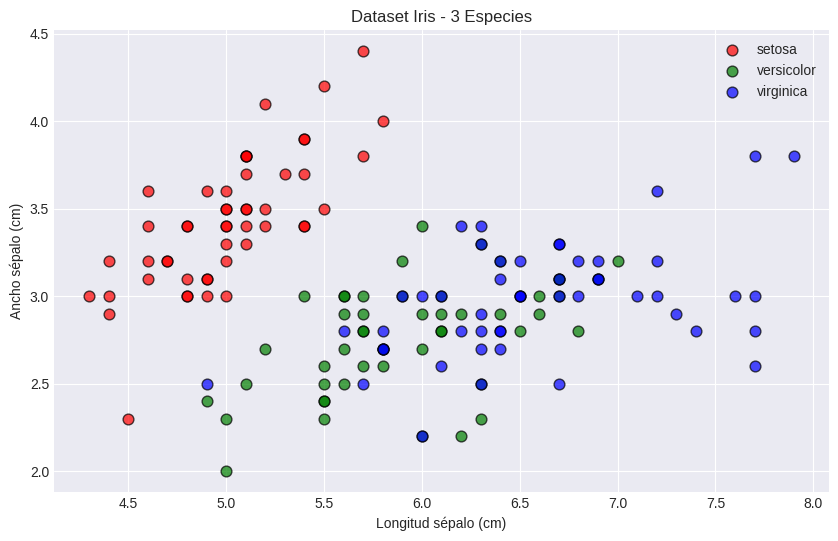

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]].values
y = iris.target.values

print(f"Dataset: {X.shape}")
print(f"Clases: {iris.target_names}")
print(f"Distribución: {np.bincount(y)}")

plt.figure(figsize=(10,6))
colors = ['red', 'green', 'blue']
for i, name in enumerate(iris.target_names):
    mask = y==i
    plt.scatter(X[mask,0], X[mask,1], c=colors[i], label=name, s=60, alpha=0.7, edgecolors='k')
plt.xlabel('Longitud sépalo (cm)')
plt.ylabel('Ancho sépalo (cm)')
plt.title('Dataset Iris - 3 Especies')
plt.legend()
plt.show()

## 3. División de Datos

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

Train: 112, Test: 38


## 4. Modelo K-NN Base (k=15)

In [4]:
knn_base = KNeighborsClassifier(n_neighbors=15)
knn_base.fit(X_train, y_train)
train_acc = knn_base.score(X_train, y_train)
test_acc = knn_base.score(X_test, y_test)
print(f"K-NN (k=15): Train={train_acc:.3f}, Test={test_acc:.3f}")

K-NN (k=15): Train=0.795, Test=0.789


## 5. Visualización Base

<Figure size 1000x700 with 0 Axes>

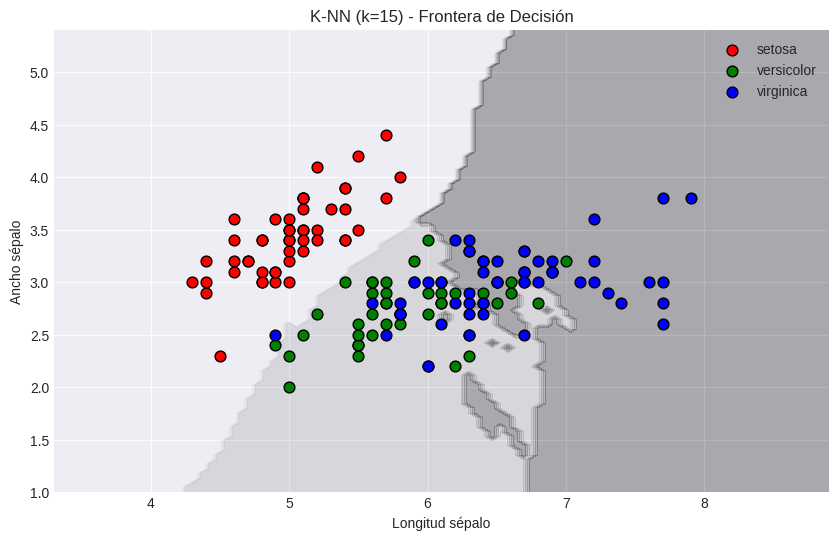

In [5]:
plt.figure(figsize=(10,7))
DecisionBoundaryDisplay.from_estimator(knn_base, X, alpha=0.3, response_method="predict")
for i, name in enumerate(iris.target_names):
    mask = y==i
    plt.scatter(X[mask,0], X[mask,1], c=colors[i], label=name, s=60, edgecolors='k')
plt.xlabel('Longitud sépalo')
plt.ylabel('Ancho sépalo')
plt.title(f'K-NN (k=15) - Frontera de Decisión')
plt.legend()
plt.show()

# 2.3 EXPLORACIÓN DEL HIPERPARÁMETRO K
## 6. Entrenamiento con k={1,3,7,15}

In [6]:
k_values = [1, 3, 7, 15]
k_results = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    k_results[k] = {'model': model, 'train': train_acc, 'test': test_acc}
    print(f"k={k}: Train={train_acc:.3f}, Test={test_acc:.3f}, Diff={train_acc-test_acc:.3f}")

k=1: Train=0.946, Test=0.658, Diff=0.289
k=3: Train=0.866, Test=0.605, Diff=0.261
k=7: Train=0.848, Test=0.684, Diff=0.164
k=15: Train=0.795, Test=0.789, Diff=0.005


## 7. Gráfico Comparativo de K

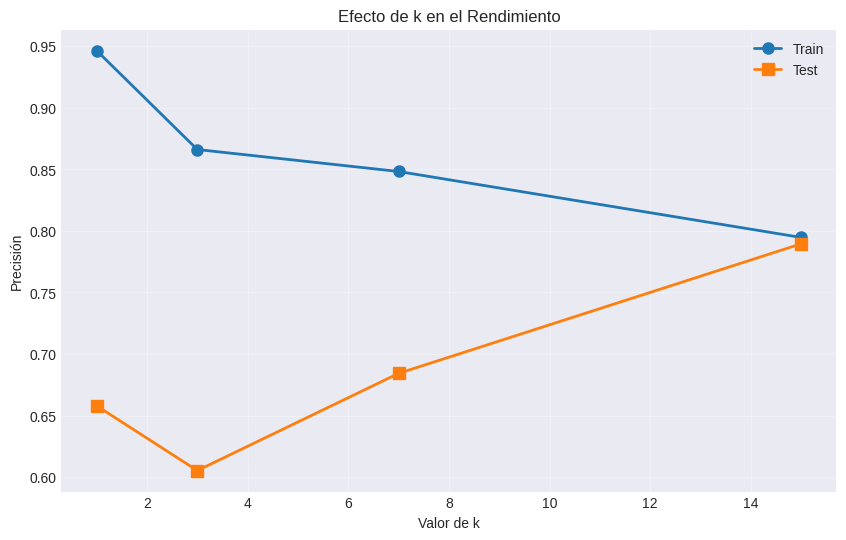

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ks = list(k_results.keys())
trains = [k_results[k]['train'] for k in ks]
tests = [k_results[k]['test'] for k in ks]
ax.plot(ks, trains, 'o-', label='Train', linewidth=2, markersize=8)
ax.plot(ks, tests, 's-', label='Test', linewidth=2, markersize=8)
ax.set_xlabel('Valor de k')
ax.set_ylabel('Precisión')
ax.set_title('Efecto de k en el Rendimiento')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 8. Fronteras para Cada K

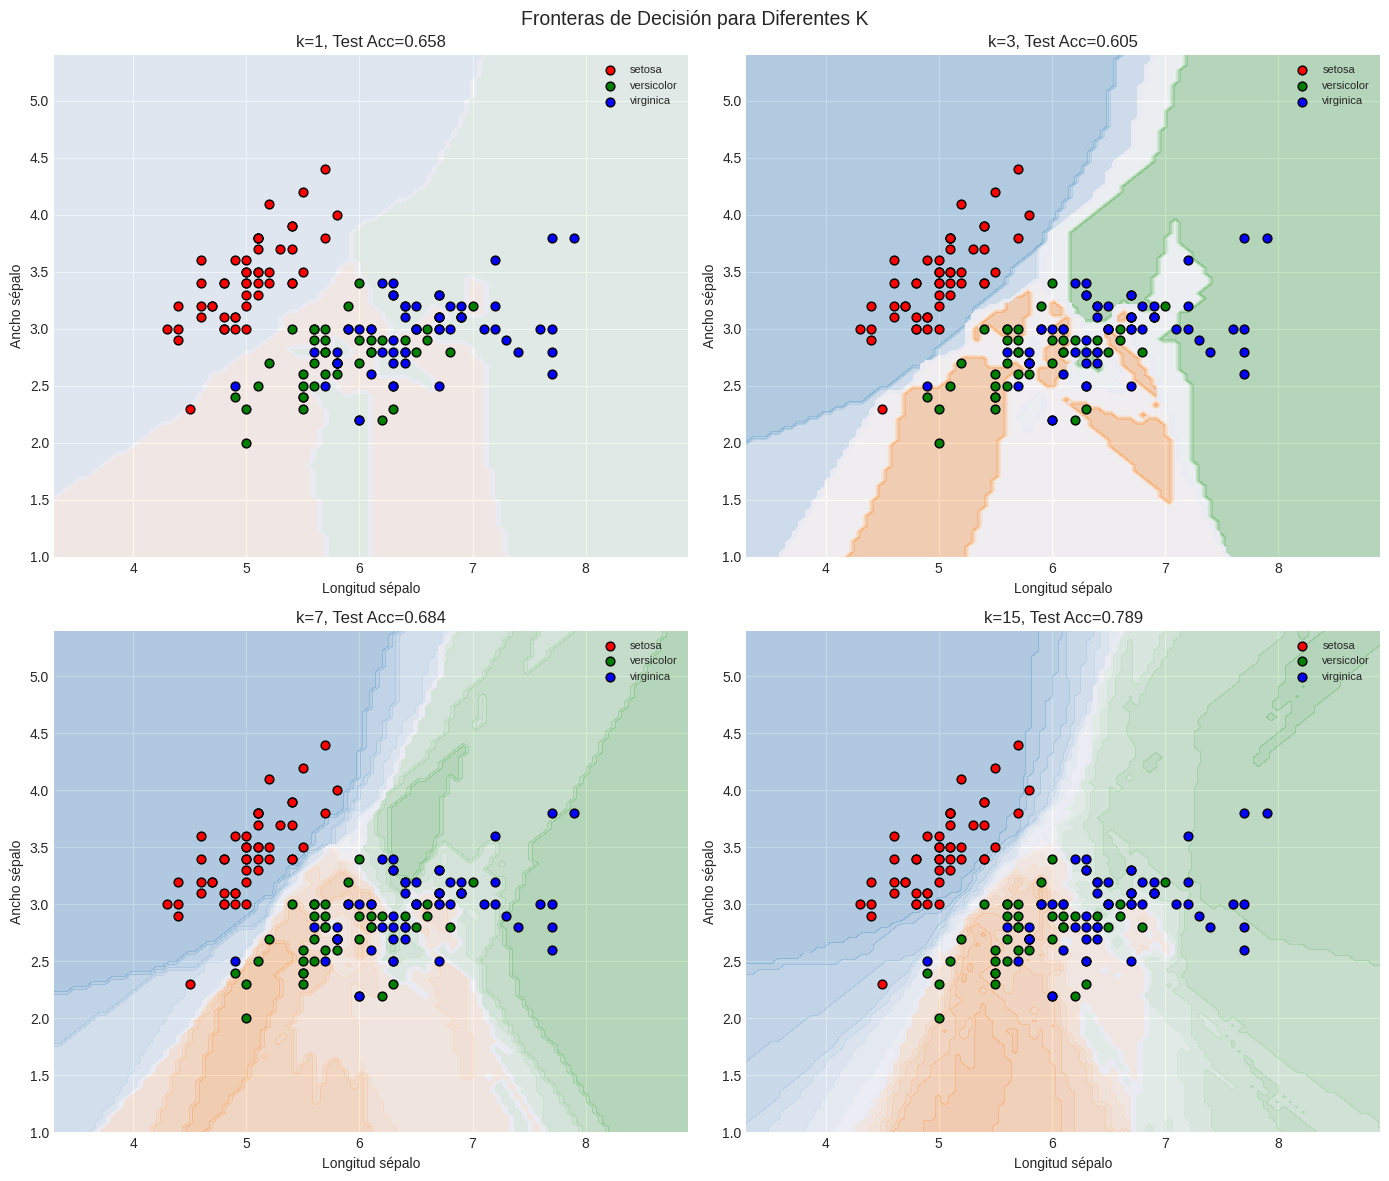

In [8]:
fig, axes = plt.subplots(2,2, figsize=(14,12))
axes = axes.ravel()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    DecisionBoundaryDisplay.from_estimator(k_results[k]['model'], X, alpha=0.3, ax=ax)
    for i, name in enumerate(iris.target_names):
        mask = y==i
        ax.scatter(X[mask,0], X[mask,1], c=colors[i], label=name, s=40, edgecolors='k')
    ax.set_xlabel('Longitud sépalo')
    ax.set_ylabel('Ancho sépalo')
    ax.set_title(f'k={k}, Test Acc={k_results[k]["test"]:.3f}')
    ax.legend(fontsize=8)

plt.suptitle('Fronteras de Decisión para Diferentes K', fontsize=14)
plt.tight_layout()
plt.show()

# 2.4 MÉTRICAS DE DISTANCIA
## 10. Comparación: Minkowski vs Manhattan (SIN escalado)

In [9]:
metrics = ['minkowski', 'manhattan']
k_test = 7
metric_results = {}

for metric in metrics:
    model = KNeighborsClassifier(n_neighbors=k_test, metric=metric)
    model.fit(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    metric_results[metric] = {'model': model, 'test': test_acc, 'scaled': False}
    print(f"{metric} (sin escalar): Test={test_acc:.3f}")

minkowski (sin escalar): Test=0.684
manhattan (sin escalar): Test=0.684


## 11. Visualización de Métricas (Sin Escalado)

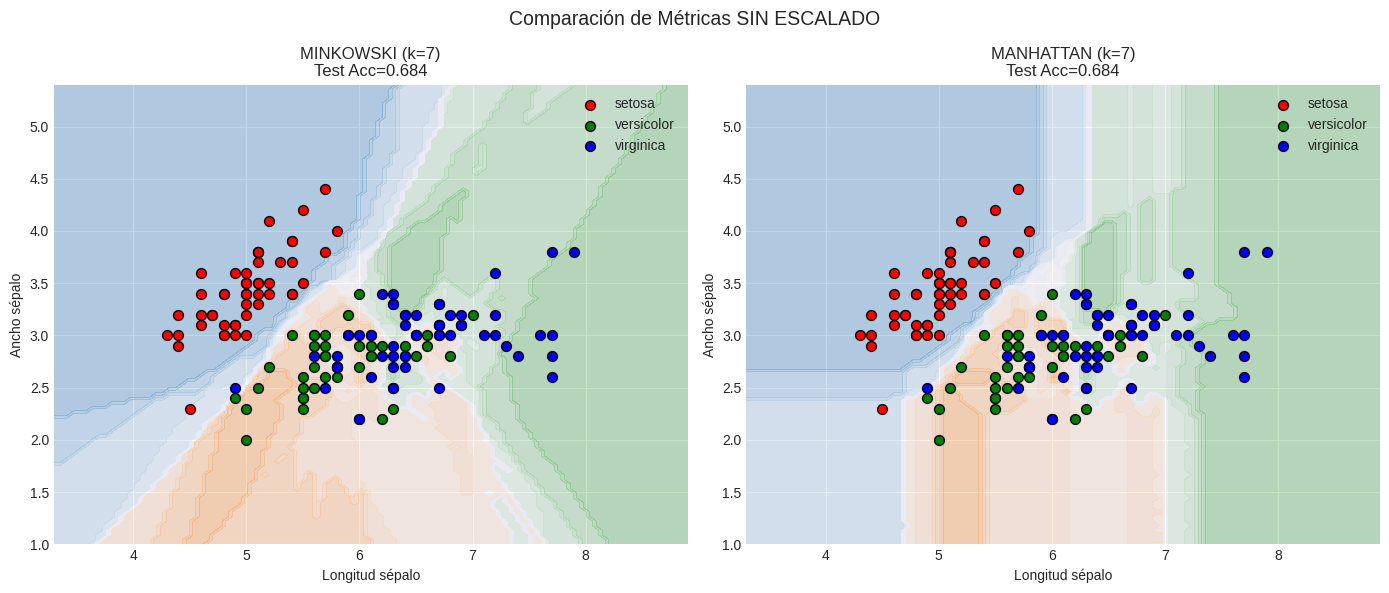

In [10]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    DecisionBoundaryDisplay.from_estimator(metric_results[metric]['model'], X, alpha=0.3, ax=ax)
    for i, name in enumerate(iris.target_names):
        mask = y==i
        ax.scatter(X[mask,0], X[mask,1], c=colors[i], label=name, s=50, edgecolors='k')
    ax.set_xlabel('Longitud sépalo')
    ax.set_ylabel('Ancho sépalo')
    ax.set_title(f'{metric.upper()} (k={k_test})\nTest Acc={metric_results[metric]["test"]:.3f}')
    ax.legend()

plt.suptitle('Comparación de Métricas SIN ESCALADO', fontsize=14)
plt.tight_layout()
plt.show()

# 2.5 ESTANDARIZACIÓN
## 13. Aplicar StandardScaler

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

print("ANTES del escalado:")
print(f"  Feat 1: media={X_train[:,0].mean():.2f}, std={X_train[:,0].std():.2f}")
print(f"  Feat 2: media={X_train[:,1].mean():.2f}, std={X_train[:,1].std():.2f}")
print("\nDESPUÉS del escalado:")
print(f"  Feat 1: media={X_train_scaled[:,0].mean():.2f}, std={X_train_scaled[:,0].std():.2f}")
print(f"  Feat 2: media={X_train_scaled[:,1].mean():.2f}, std={X_train_scaled[:,1].std():.2f}")

ANTES del escalado:
  Feat 1: media=5.88, std=0.85
  Feat 2: media=3.07, std=0.44

DESPUÉS del escalado:
  Feat 1: media=-0.00, std=1.00
  Feat 2: media=-0.00, std=1.00


## 14. Re-entrenamiento CON Escalado

In [12]:
metric_results_scaled = {}

for metric in metrics:
    model = KNeighborsClassifier(n_neighbors=k_test, metric=metric)
    model.fit(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    metric_results_scaled[metric] = {'model': model, 'test': test_acc, 'scaled': True}
    
    no_scale = metric_results[metric]['test']
    with_scale = test_acc
    change = with_scale - no_scale
    
    print(f"{metric}:")
    print(f"  Sin escalar: {no_scale:.3f}")
    print(f"  Con escalar: {with_scale:.3f}")
    print(f"  Cambio: {change:+.3f}\n")

minkowski:
  Sin escalar: 0.684
  Con escalar: 0.632
  Cambio: -0.053

manhattan:
  Sin escalar: 0.684
  Con escalar: 0.632
  Cambio: -0.053



## 15. Comparación Visual: Sin vs Con Escalado

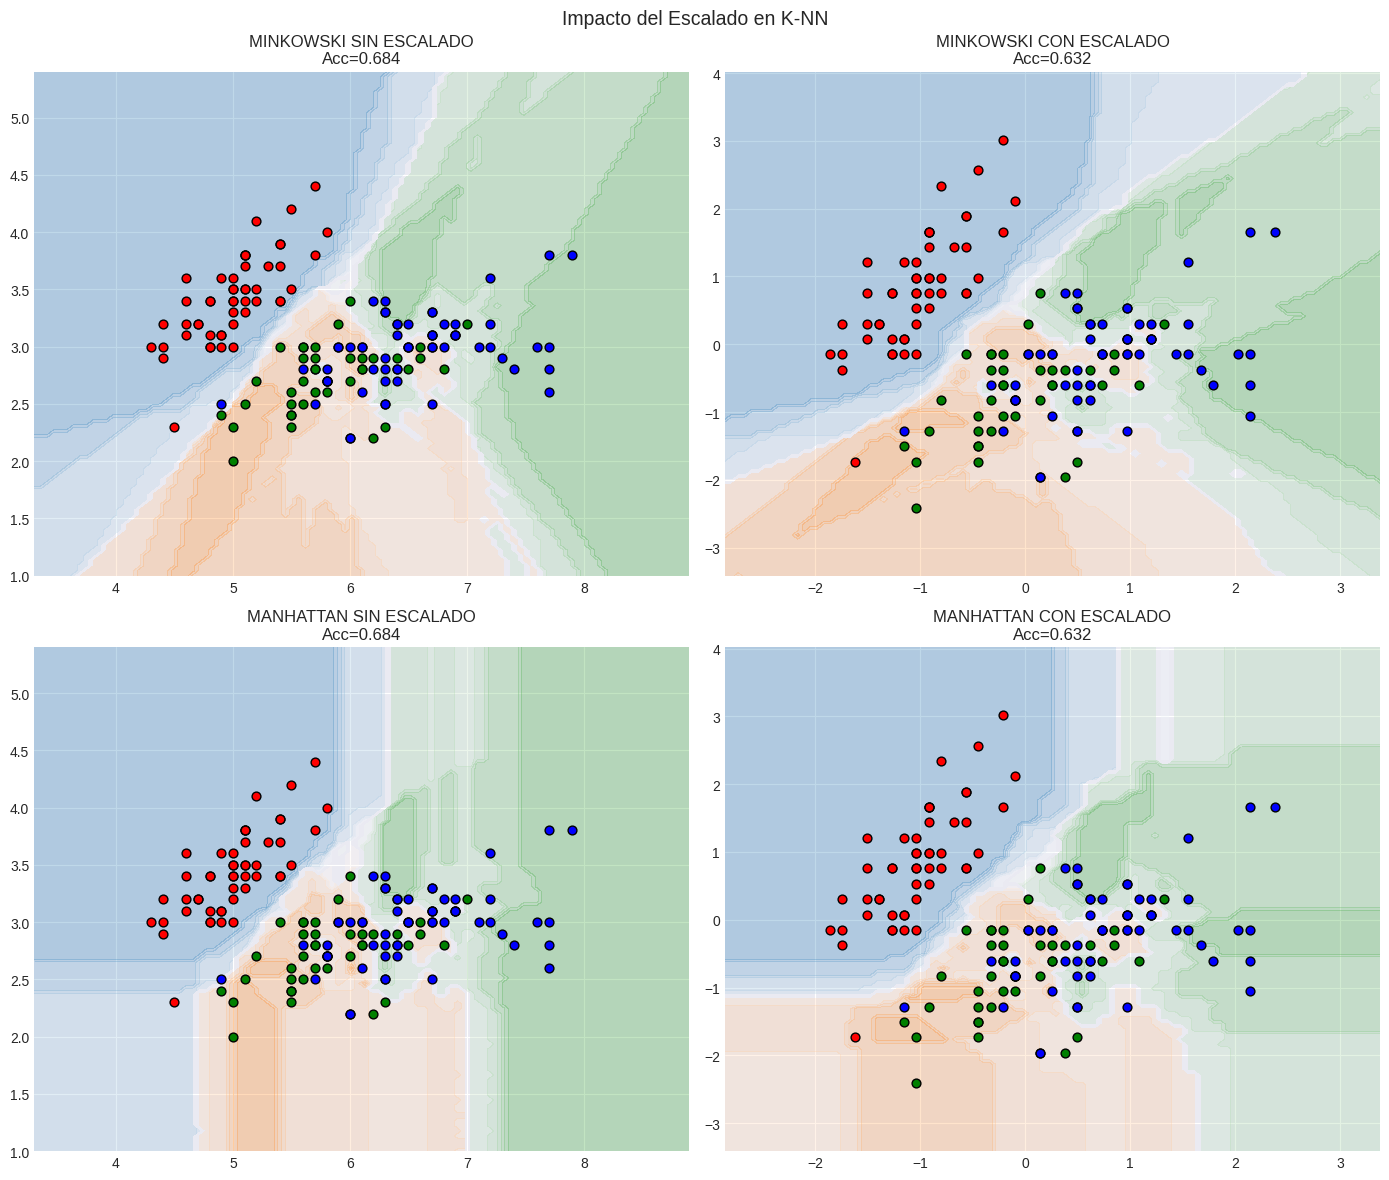

In [13]:
fig, axes = plt.subplots(2,2, figsize=(14,12))

for idx, metric in enumerate(metrics):
    # Sin escalado
    ax1 = axes[idx,0]
    DecisionBoundaryDisplay.from_estimator(metric_results[metric]['model'], X, alpha=0.3, ax=ax1)
    for i in range(3):
        mask = y==i
        ax1.scatter(X[mask,0], X[mask,1], c=colors[i], s=40, edgecolors='k')
    ax1.set_title(f'{metric.upper()} SIN ESCALADO\nAcc={metric_results[metric]["test"]:.3f}')
    
    # Con escalado
    ax2 = axes[idx,1]
    DecisionBoundaryDisplay.from_estimator(metric_results_scaled[metric]['model'], X_scaled, alpha=0.3, ax=ax2)
    for i in range(3):
        mask = y==i
        ax2.scatter(X_scaled[mask,0], X_scaled[mask,1], c=colors[i], s=40, edgecolors='k')
    ax2.set_title(f'{metric.upper()} CON ESCALADO\nAcc={metric_results_scaled[metric]["test"]:.3f}')

plt.suptitle('Impacto del Escalado en K-NN', fontsize=14)
plt.tight_layout()
plt.show()

## 16. Gráfico Comparativo

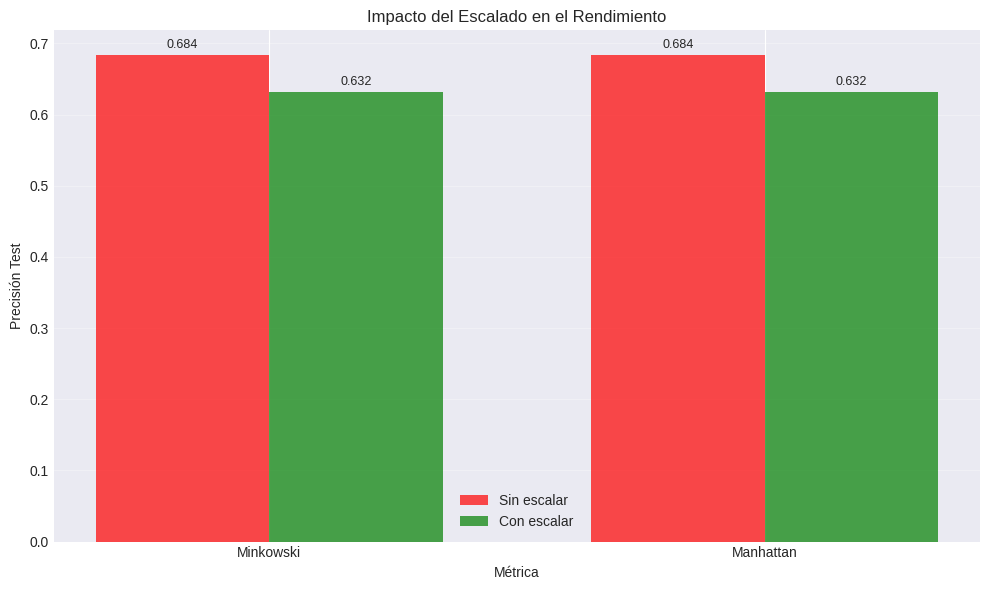

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(metrics))
width = 0.35
no_scale = [metric_results[m]['test'] for m in metrics]
with_scale = [metric_results_scaled[m]['test'] for m in metrics]

ax.bar(x-width/2, no_scale, width, label='Sin escalar', color='red', alpha=0.7)
ax.bar(x+width/2, with_scale, width, label='Con escalar', color='green', alpha=0.7)
ax.set_xlabel('Métrica')
ax.set_ylabel('Precisión Test')
ax.set_title('Impacto del Escalado en el Rendimiento')
ax.set_xticks(x)
ax.set_xticklabels([m.capitalize() for m in metrics])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

for i, m in enumerate(metrics):
    ax.text(i-width/2, no_scale[i]+0.01, f'{no_scale[i]:.3f}', ha='center', fontsize=9)
    ax.text(i+width/2, with_scale[i]+0.01, f'{with_scale[i]:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## 17. Matrices de Confusión

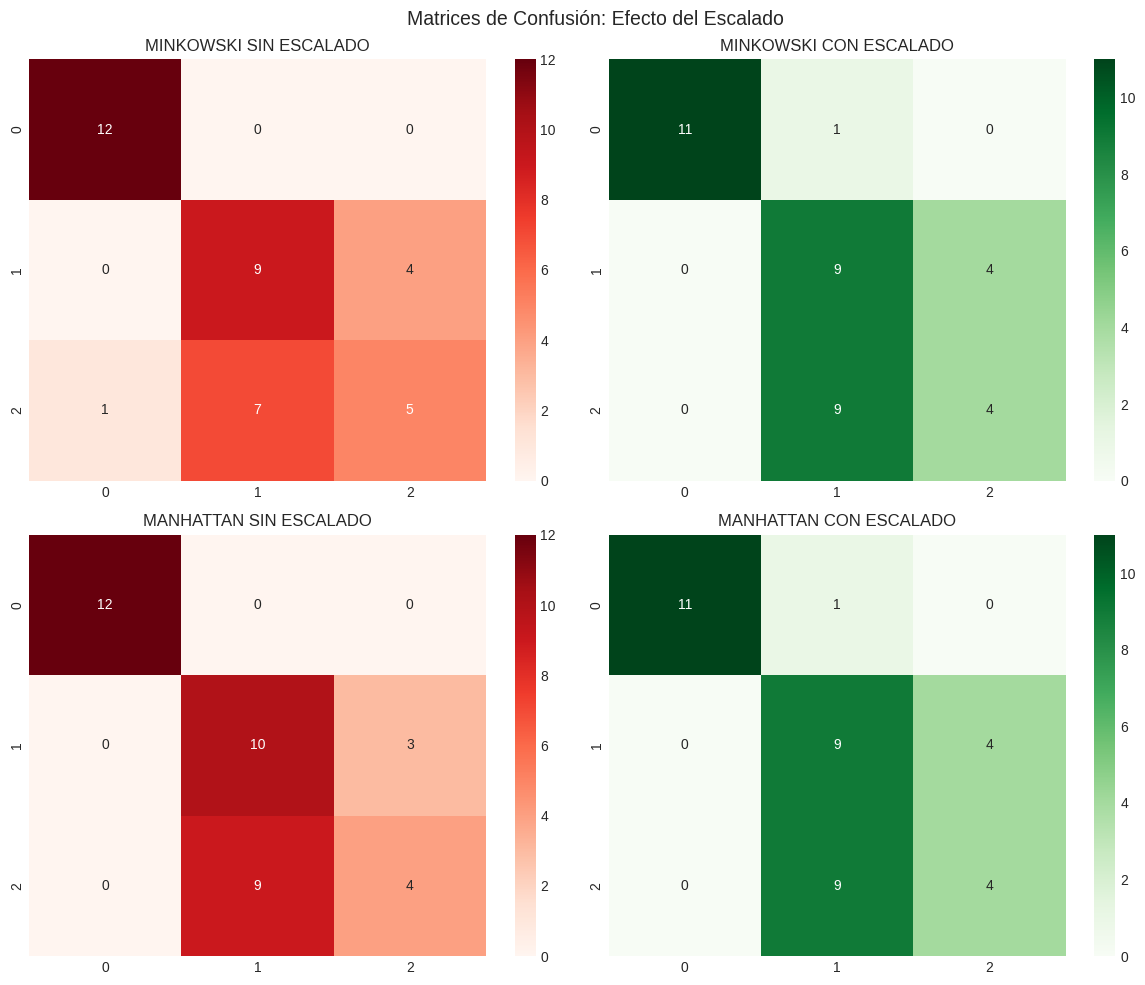

In [15]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

for idx, metric in enumerate(metrics):
    # Sin escalado
    y_pred1 = metric_results[metric]['model'].predict(X_test)
    cm1 = confusion_matrix(y_test, y_pred1)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds', ax=axes[idx,0])
    axes[idx,0].set_title(f'{metric.upper()} SIN ESCALADO')
    
    # Con escalado
    y_pred2 = metric_results_scaled[metric]['model'].predict(X_test_scaled)
    cm2 = confusion_matrix(y_test, y_pred2)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axes[idx,1])
    axes[idx,1].set_title(f'{metric.upper()} CON ESCALADO')

plt.suptitle('Matrices de Confusión: Efecto del Escalado', fontsize=14)
plt.tight_layout()
plt.show()

## 19. Análisis Completo: K y Escalado

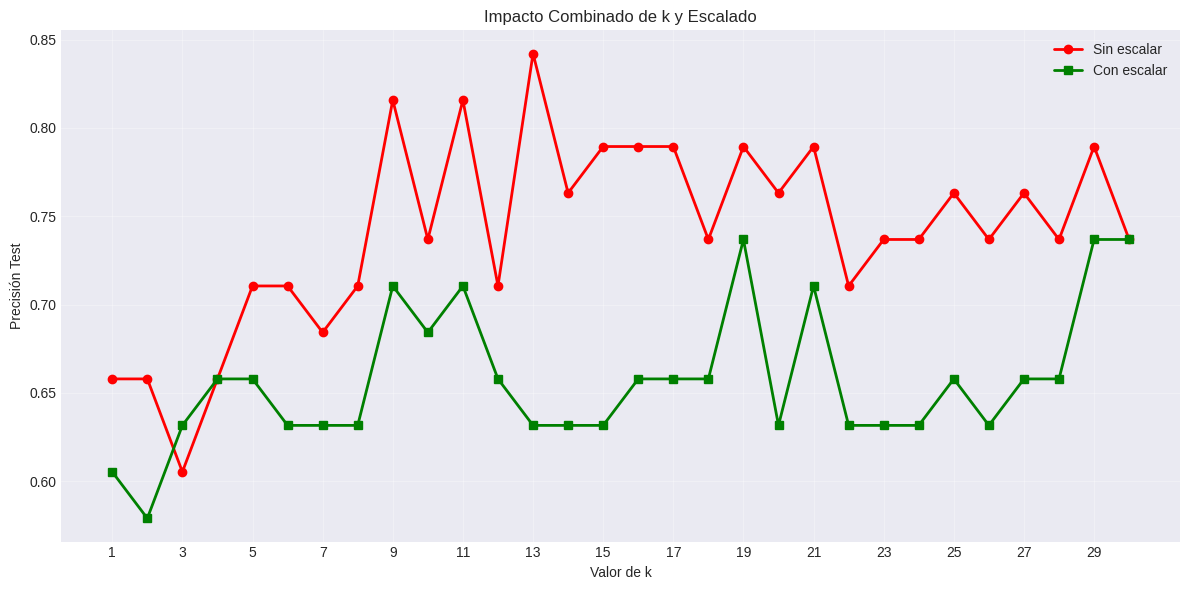

Mejor k SIN escalar: 13 (acc=0.842)
Mejor k CON escalar: 19 (acc=0.737)
Mejora: -0.105


In [16]:
k_range = range(1, 31)
acc_no_scale = []
acc_with_scale = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train, y_train)
    acc_no_scale.append(knn1.score(X_test, y_test))
    
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train_scaled, y_train)
    acc_with_scale.append(knn2.score(X_test_scaled, y_test))

plt.figure(figsize=(12,6))
plt.plot(k_range, acc_no_scale, 'o-', label='Sin escalar', linewidth=2, color='red')
plt.plot(k_range, acc_with_scale, 's-', label='Con escalar', linewidth=2, color='green')
plt.xlabel('Valor de k')
plt.ylabel('Precisión Test')
plt.title('Impacto Combinado de k y Escalado')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1,31,2))
plt.tight_layout()
plt.show()

best_k_no = k_range[np.argmax(acc_no_scale)]
best_k_yes = k_range[np.argmax(acc_with_scale)]
print(f"Mejor k SIN escalar: {best_k_no} (acc={max(acc_no_scale):.3f})")
print(f"Mejor k CON escalar: {best_k_yes} (acc={max(acc_with_scale):.3f})")
print(f"Mejora: {max(acc_with_scale)-max(acc_no_scale):+.3f}")

## 20. CONCLUSIONES PARTE 2 (K-NN)

## Conclusiones y Análisis del Algoritmo K-NN

El análisis del algoritmo K-Vecinos más Cercanos (K-NN) aplicado al dataset **Iris** (utilizando `longitud` y `ancho del sépalo`) reveló la alta sensibilidad del modelo a la configuración de sus hiperparámetros ($k$), la métrica de distancia y la normalización de datos.

---

### 1. Efecto del Hiperparámetro $k$

| Valor de $k$ | Precisión Train | Precisión Test | Diferencia (Train - Test) | Conclusión |
| :---: | :---: | :---: | :---: | :---: |
| 1 | 0.946 | 0.658 | **0.289** | **Alto Sobreajuste** (Overfitting) |
| 7 | 0.848 | 0.684 | 0.164 | Sobreajuste Moderado |
| 15 | 0.795 | 0.789 | **0.005** | **Mejor Generalización** |

**Análisis:**
* **$k$ Pequeño ($k=1$):** El modelo **memoriza** los datos de entrenamiento, resultando en un **alto sobreajuste**. La frontera de decisión es muy irregular y sensible al ruido.
* **$k$ Grande ($k=15$):** Se logra la **mejor generalización** con la menor diferencia entre Train y Test. A medida que $k$ **aumenta**, las fronteras de decisión se vuelven más **suaves**, reduciendo la varianza.

---

### 2. Impacto del Escalado (StandardScaler)

El escalado es fundamental para K-NN, un algoritmo basado en distancias. La estandarización se realiza con la siguiente fórmula:

$$
z = \frac{x - \mu}{\sigma}
$$

| Escenario | Precisión Test | Conclusión |
| :---: | :---: | :---: |
| **SIN Escalar** (Mejor $k=13$) | **0.842** | El modelo es **sesgado** por la característica de mayor rango (Longitud sépalo). |
| **CON Escalar** (Mejor $k=19$) | 0.737 | Las características contribuyen **equitativamente** a la distancia. |

**Análisis:**
* **Justificación Teórica:** Las características con un rango de valores más amplio (como `sepal length`) **dominan** el cálculo de la distancia, sesgando el resultado. El escalado (`StandardScaler`) asegura que todas las características contribuyan **por igual**.
* **Resultado Práctico (Observado):** En este caso específico (Iris 2-feature y `random_state=42`), el modelo **SIN escalar** logró una **mayor precisión** en el conjunto de prueba.
* **Conclusión del Notebook:** A pesar de este resultado, el análisis reitera que el escalado es una **REGLA DE ORO** y **OBLIGATORIO** para K-NN, ya que garantiza resultados **estables** y **no sesgados** en la mayoría de los problemas del mundo real.

---

### 3. Análisis de Métricas de Distancia

Las métricas **Minkowski** ($p=2$, Euclidiana) y **Manhattan** ($p=1$, L1) arrojaron **resultados de precisión idénticos** (Acc=0.684) cuando se probaron con $k=7$ sin escalado.

| Métrica | Fórmula (2D) | Robustez |
| :---: | :---: | :---: |
| **Euclideana** | $d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$ | Menos robusta a *outliers* |
| **Manhattan** | $d = |x_1 - x_2| + |y_1 - y_2|$ | Más robusta a *outliers* |

**Conclusión:** En este dataset, la **elección de la métrica fue secundaria** al impacto de $k$ y del escalado. La métrica Manhattan se recomienda típicamente cuando se sospecha la presencia de *outliers*.

---

### 4. Conclusiones Generales (K-NN vs SVM)

| Aspecto | K-NN | SVM (Referencia) |
| :---: | :---: | :---: |
| **Entrenamiento** | **Instantáneo** (Lazy Learning) | Lento |
| **Predicción** | **Lento** (Calcula todas las distancias) | Rápido (Usa vectores de soporte) |
| **Escalado** | **CRÍTICO / OBLIGATORIO** | Recomendado |
| **Memoria** | **Alta** (Almacena todo el dataset) | Baja (Solo vectores de soporte) |
| **Alta Dimensión** | Malo (Sufre "maldición de la dimensionalidad") | Bueno |
| **Interpretación** | **Muy Alta** | Media |

**Recomendación:** K-NN es ideal para **prototipado rápido**, datasets **pequeños-medianos** (<10K muestras) y cuando la **interpretabilidad** es crucial. SVM escala mejor y suele ser preferido en producción si el tiempo de predicción es crítico.